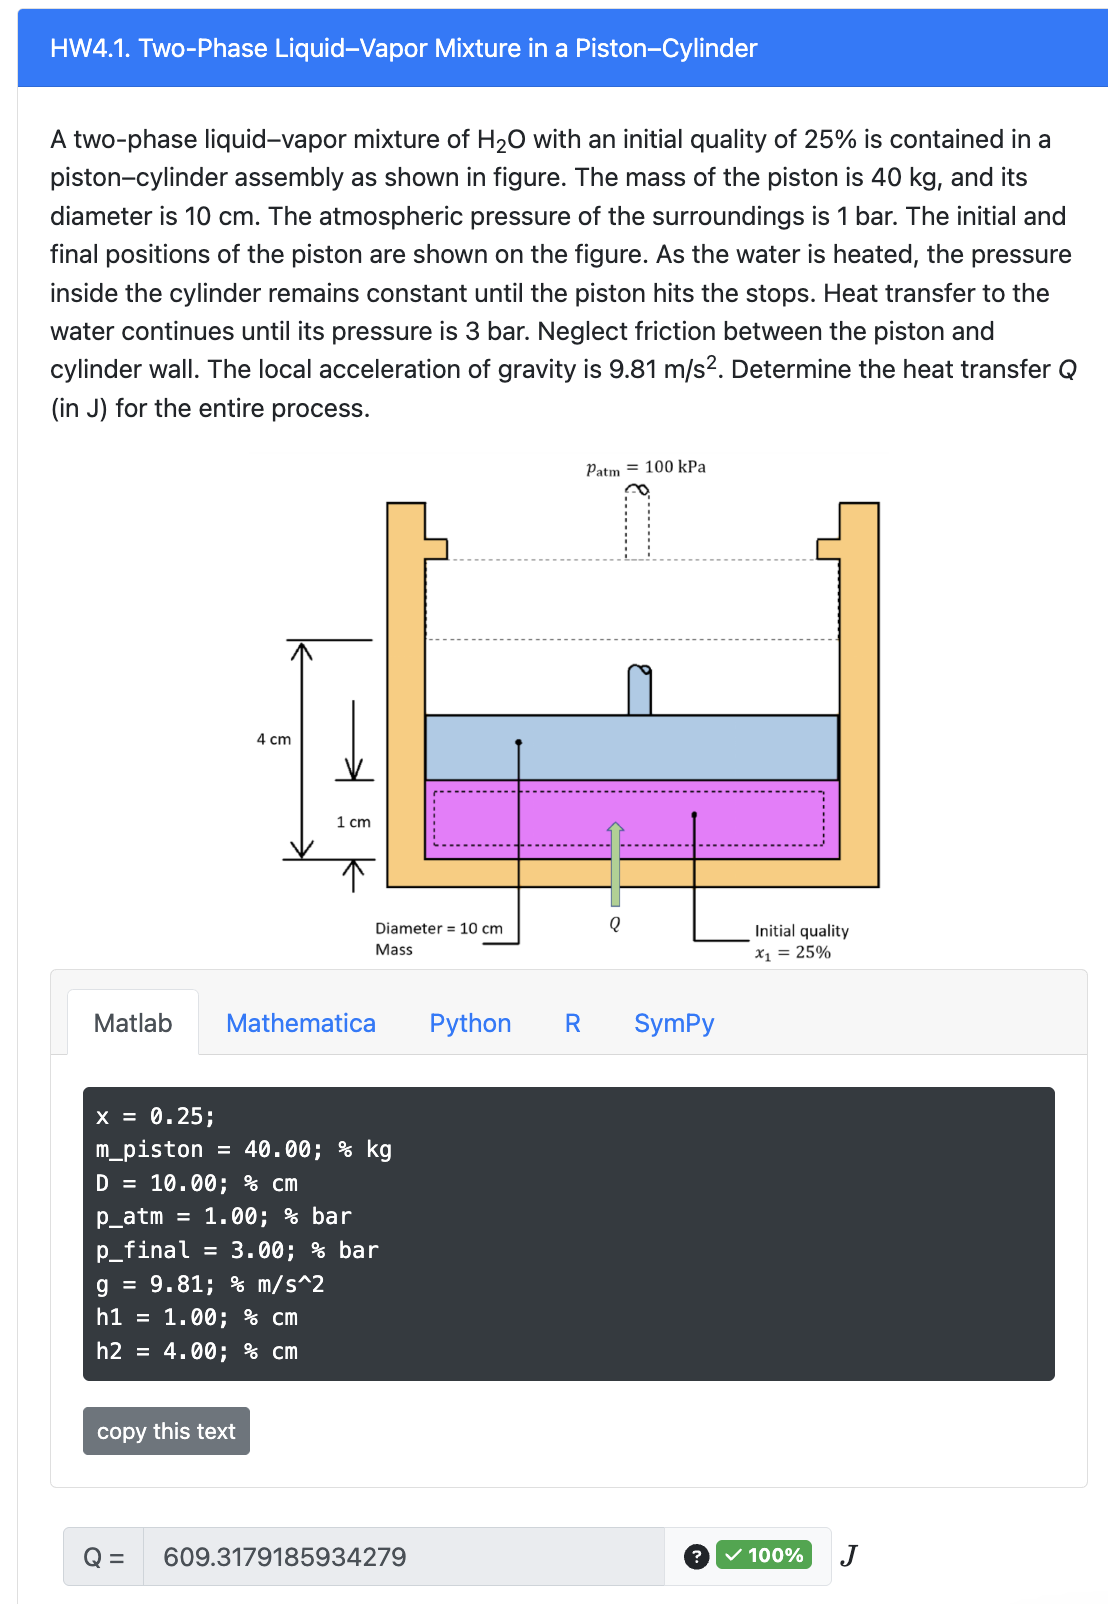

In [ ]:
# 4.1

# 思路 
# 第一个 混合态 p1=p0+mg/s 查表得到v1 查表h1
# 第二个 算v2发现是superheated 查表h2

# m=v_1/v1
# Q12=(h2-h1)*m

from math import * 
import sympy as sy
import numpy as np

import numpy as np

x = 0.25
m_piston = 40.00 # kg
D = 10.00 # cm
p_atm = 1.00 # bar
p_final = 3.00 # bar
g = 9.81 # m/s^2
h1 = 1.00 # cm
h2 = 4.00 # cm

# ======================

D=D*1e-2
h1=h1*1e-2
h2=h2*1e-2



A=(D/2)**2*pi
p1=p_atm*1e5+m_piston*g/A
v1=x*1.159+(1-x)*0.0010528
h_1=x*2693.6+(1-x)*467.11
u_1=x*2519.7+(1-x)*466.94
print(float(v1))

v2=v1/h1*h2 
print(float(v2))
h_2=(v2-1.094)/(1.187-1.094)*(3486-3358.7)+3358.7
u_2=(v2-1.094)/(1.187-1.094)*(3130-3030.6)+3030.6

m=h1*A/v1



print((h_2-h_1)*m*1000)
print((u_2-u_1)*m*1000+(v2-v1)*m*p1)
# 按道理讲 上面应该也是对的，但是实际上答案只任下面


0.2905396
1.1621584
656.4179202671858
609.3179185934279


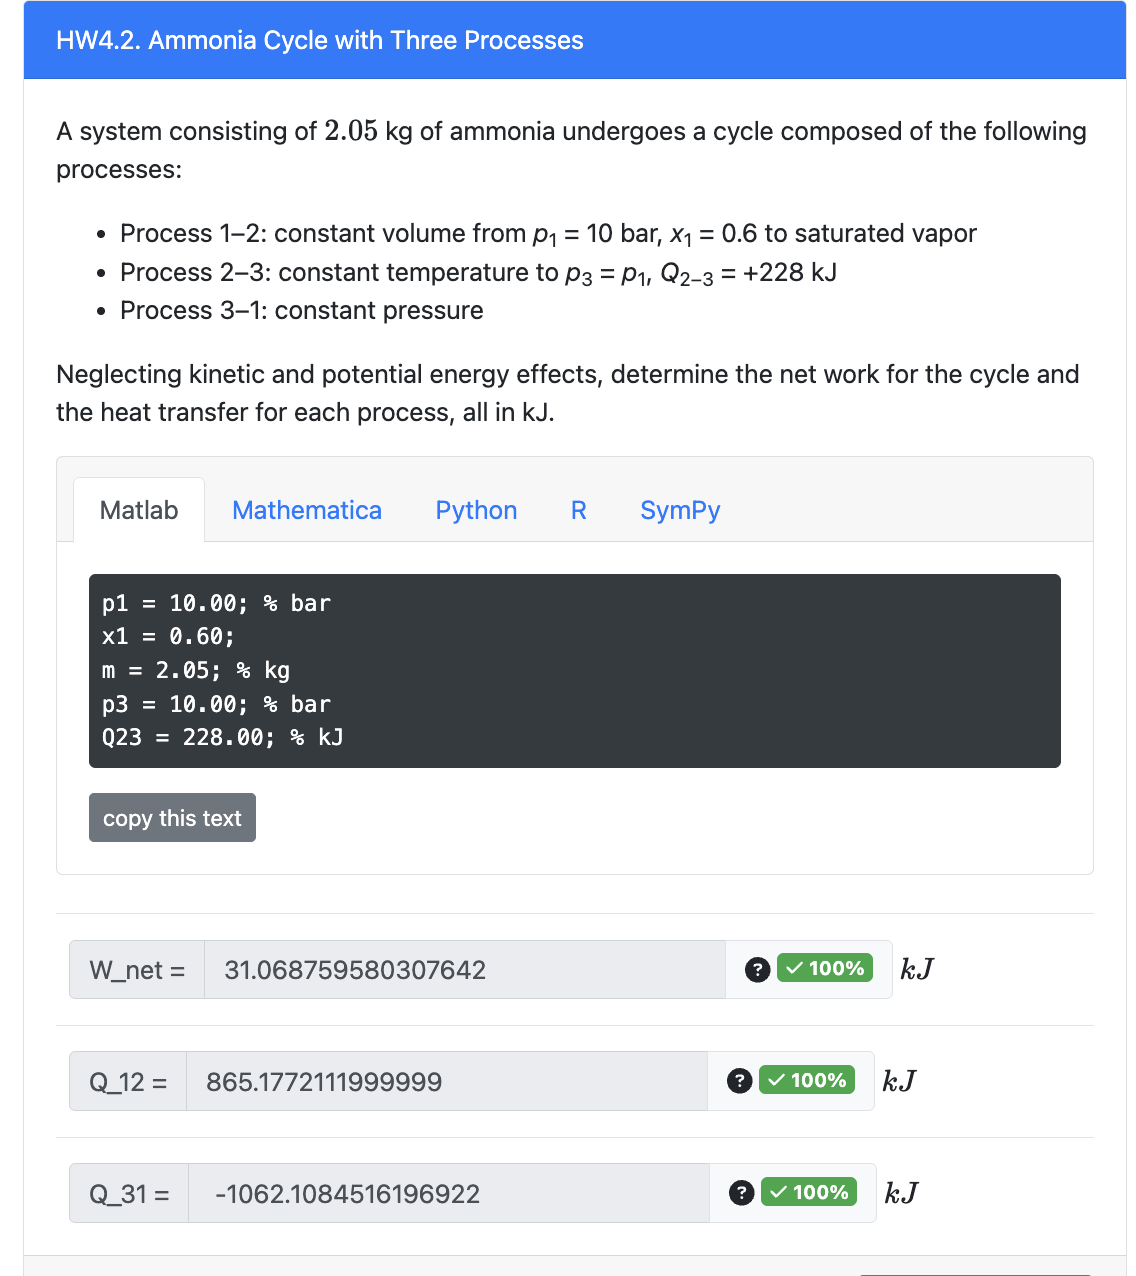

In [ ]:
# 4.2
# 思路
# 第一阶段混合物 p1知道 x知道 算出v1,u1
# 第二阶段混合物变成气体 v2知道 读表找到t2，h2,u2
# 第三阶段气体 p3 t3知道 读表找到h3
# Q12=(u2-u1)*m
# Q31=(h1-h3)*m
# W=Q12+Q31+Q


import numpy as np

p1 = 10.00 # bar
x1 = 0.60
m = 2.05 # kg
p3 = 10.00 # bar
Q23 = 228.00 # kJ

p1=p1*1e5
p3=p3*1e5

# 读表
v1=0.0016584*(1-x1)+0.1285*x1
u1=296.1*(1-x1)+1334.66*x1
v2=v1
h1=297.76*(1-x1)+1463.18*x1
# print(v2)

t2=(v2-0.0808)/(0.0717-0.0808)*(45.38-41.03)+41.03
u2=(v2-0.0808)/(0.0717-0.0808)*(1341.88-1340.97)+1340.97

p3=p1
t3=t2
h3=(t3-40)/(50-40)*(1536.06-1508.2)+1508.2

Q12=(u2-u1)*m
Q31=(h1-h3)*m
W=Q12+Q31+Q23

print(W,Q12,Q31)



31.068759580307642 865.1772111999999 -1062.1084516196922


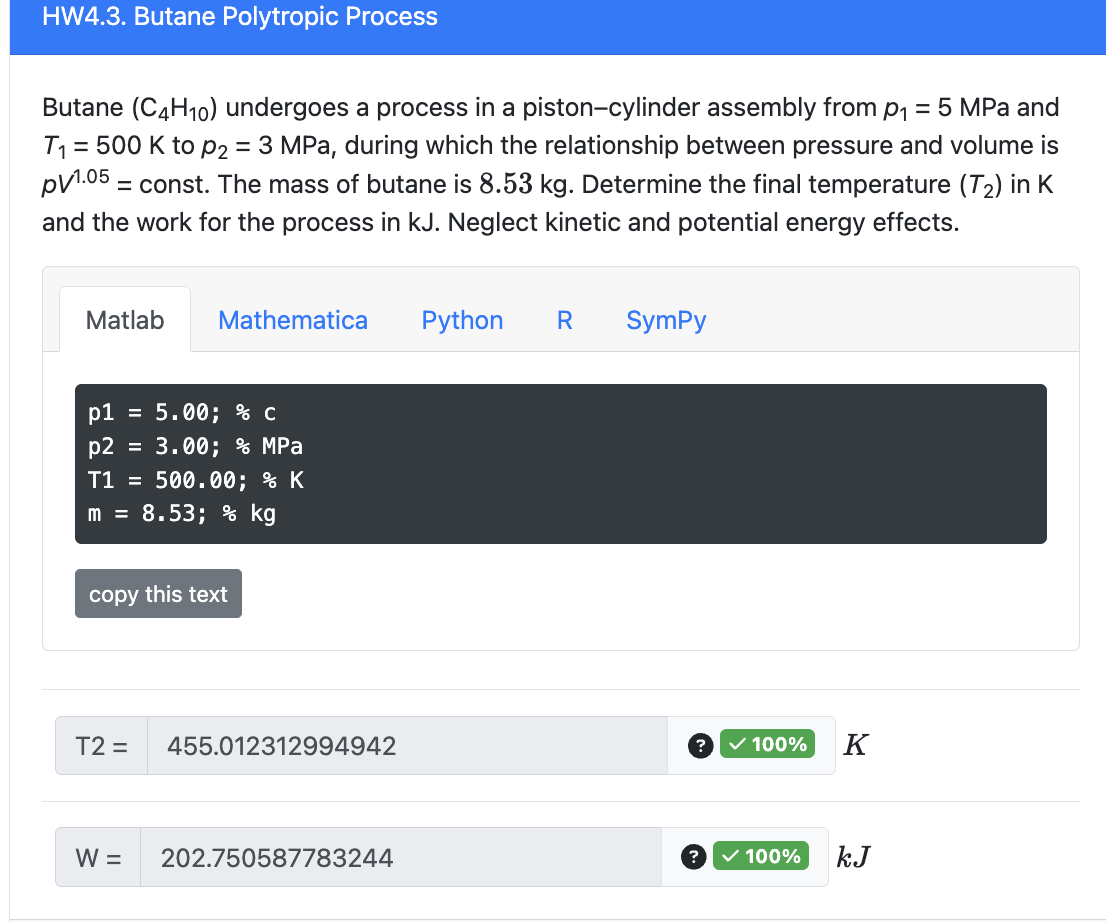

In [144]:
# 4.3
# 思路
# 第一状态 p1 t1已知 算pr tr读图得到z1 用z1=p1*v1/R/t1得到v1
# 用 pv**(1.05)固定，p1,p2,v1已知算出v2
# 第二状态 p2 v2已知 用vr=v2*pc/tc/R得到vr 算vr，pr读图得到z2 用z2=p2*v2/R/t2得到t2
# W=integrate(p*m,(v,v1,v2))

import numpy as np

p1 = 5.00 # c
p2 = 3.00 # MPa
T1 = 500.00 # K
m = 8.53 # kg
# ===================


pc=3.8e5 
tc=425 # K

p1=p1*1e5
p2=p2*1e5
R=8314/58



pr=p1/pc
tr=T1/tc
# print(pr,tr)
#读图
z1=0.69
v1=z1/p1*R*T1
# print(v1)

c=p1*v1**1.05
v2=(c/p2)**(1/1.05)
# print(v2)


from sympy import *
v=S('v')
w=integrate(c/v**1.05*m,(v,v1,v2))
# print(w)


vr=v2*pc/tc/R
pr2=p2/pc
# print(vr,pr2)
# 读图
z2=0.74
t2=p2*v2/R/z2
# print(t2)


print(t2,w/1e3)

455.012312994942 202.750587783244


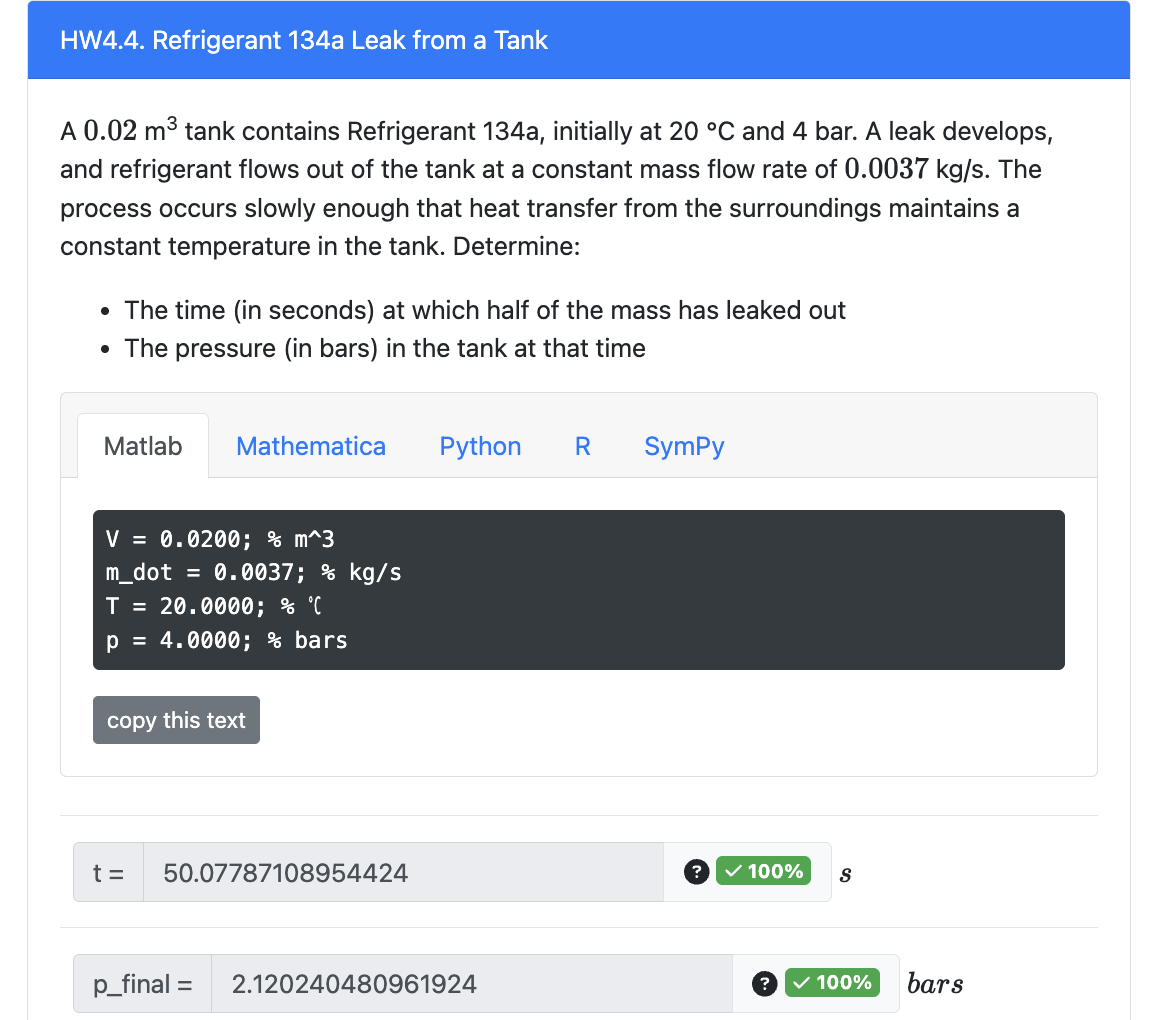

In [2]:
# 4.4
# 思路 
# 第一阶段气体 p1 t1已知 读表v1 算m=V/v1 
# 第二阶段气体 v2 t2已知 读表得p2

from sympy import *

V = 0.0400 # m^3
m_dot = 0.0036 # kg/s
T = 20.0000 # ℃
p = 4.0000 # bars
# =============================

v1=0.05397  

m = V/v1 # kg 
t = m/2/m_dot

v2 = V/(m/2)
print(v2)
p_final = (v2-0.11394)/(0.09399-0.11395)*(2.4-2)+2

print(t,p_final)


0.10794
102.93784612850762 2.120240480961924


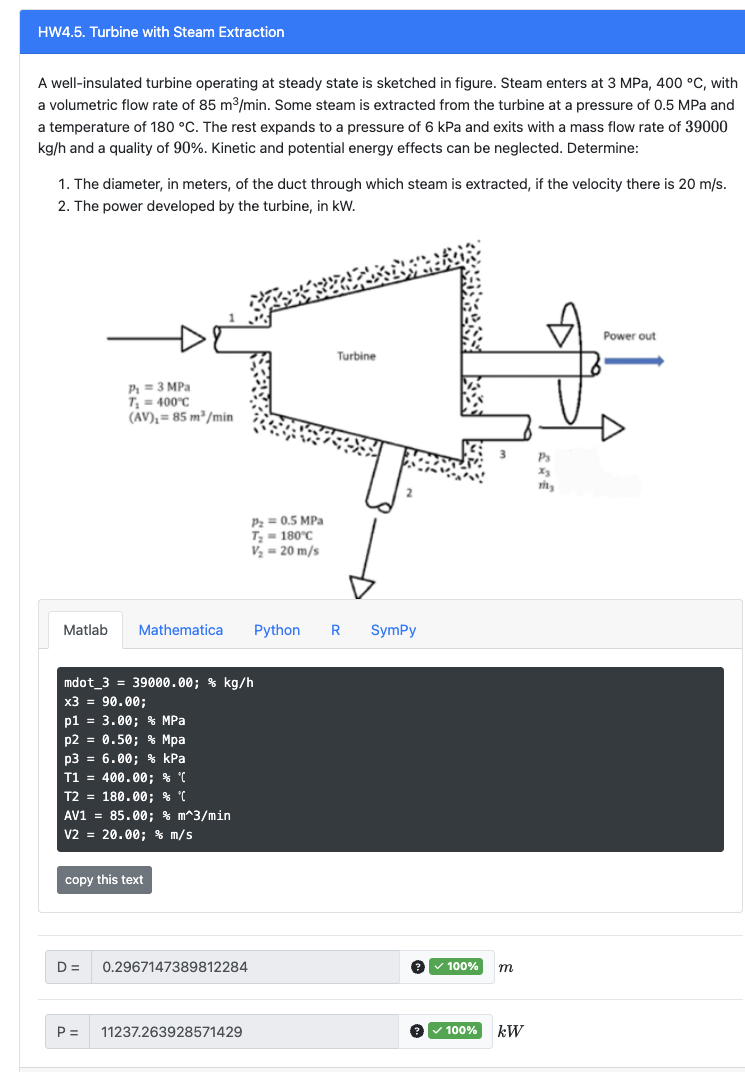

In [4]:
# 4.5

import math as m
import numpy as np
from sympy import *

mdot_3 = 39000.00 # kg/h
x3 = 90.00
p1 = 3.00 # MPa
p2 = 0.50 # Mpa
p3 = 6.00 # kPa
T1 = 400.00 # ℃
T2 = 180.00 # ℃
AV1 = 85.00 # m^3/min
V2 = 20.00 # m/s


x3=x3/100

#提取处管道指的是2号管道
m1 = AV1/0.0994/60 # 体积比容(m**3/min)/比容(m**3/kg)=质量流量每分钟(kg/min)
m3 = mdot_3/3600 # 质量流量每分钟

# 质量流量×比容=体积流量 
# 体积流量/速度-面积
s = (m1-m3)*0.4045/V2
d = m.sqrt(s/m.pi*4)


#-----------------------------------------------------------
# 这里查表 
#利用焓来计算
# 过热气体 t=400 p=3mpa
h1 = 3230.9
# 过热气体 t=180 p=0.5mpa
h2 = 2812.0

# 混合物 p=0.06 t=36.16 、
hl=151.53
hg=2567.4
# x是gas的占比
h3 = (1-x3)*hl+(x3)*hg

# print(h3)
# 因为h的单位是kj/kg所以单位不需要变，w就是kw
w = m1*h1-m3*h3-(m1-m3)*h2
d,w


(0.2967147389812284, 11237.263928571429)

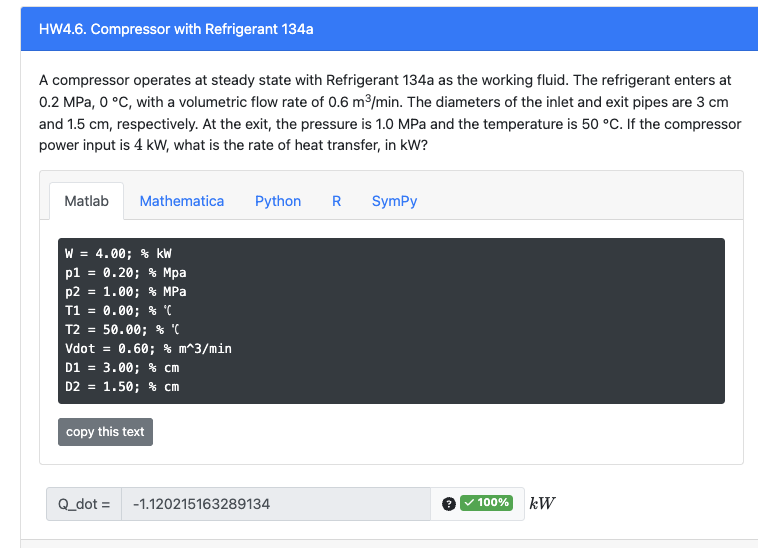

In [5]:
# 4.6
import math as m
import numpy as np

from sympy import *

W = 4.00 # kW
p1 = 0.20 # Mpa
p2 = 1.00 # MPa
T1 = 0.00 # ℃
T2 = 50.00 # ℃
Vdot = 0.60 # m^3/min
D1 = 3.00 # cm
D2 = 1.50 # cm
#------------------------------------
m1 = Vdot/60/0.10438 #kg/s


#因为1Mpa小于12bar，所以还是气态
#进去多少就出来多少，所以m3 = m1
m3 = m1
s1 = m.pi*(D1/2/100)**2
s2 = m.pi*(D2/2/100)**2

v1 = Vdot/60/s1
v3 = m3*0.02171/s2


h1 = 250.1
h3 = 280.19
Q = -(W+m1*h1-m1*h3-m1*(v3**2-v1**2)/2000)
Q


-1.120215163289134